In [2]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Maximum speed:  372.83 m/s
At altitude:  27839.31672 m


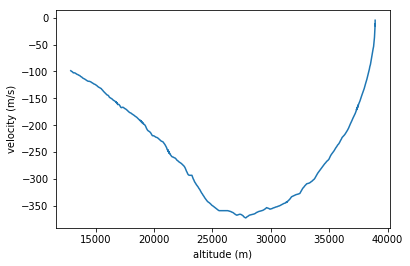

In [5]:
felixdat = np.genfromtxt('FelixXVD.csv', delimiter=',')
y = 1000*felixdat[:, 0]
v = -felixdat[:, 1]

max_v = felixdat[:,1].max()
print("Maximum speed: ", max_v, "m/s")
index_of_max = felixdat[:, 1].argmax()
print("At altitude: ", y[index_of_max], "m")


plt.plot(y,v)
plt.xlabel('altitude (m)')
plt.ylabel('velocity (m/s)')
plt.show()

1) The maximum magnitude of his velocity is 372.83 m/s

In [77]:
y = y[4:np.size(y)]
v = v[4:np.size(v)]

size = np.size(y)

In [78]:
#print(len(dfdy))
print(len(y))
print(len(v))

dfdy = ((v[2:size]**2)-(v[0:size-2]**2))/(y[2:size]-y[0:size-2])
#print(dfdy)
y = y[1:size-1]
v = v[1:size-1]


370
370


368
368
368


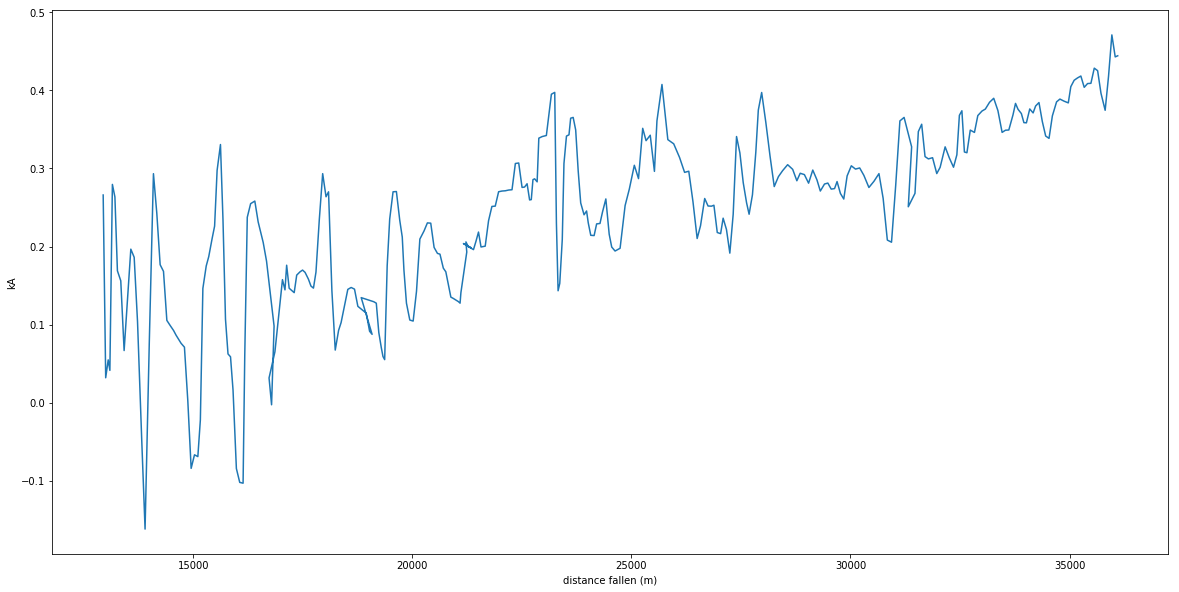

In [111]:
g = 9.8
m = 110
R = 8.3
M = 0.029
T = 300
yatm = (R*T)/(M*g)
rho0 = 1.23
ka = ((0.5*(dfdy)+g)*m*np.exp(y/yatm))/(rho0*v**2)


#f = lambda x, m, b: m*x+b

#fit, covar = curve_fit(f, y[50:],ka[50:])
#print(fit)

plt.figure(figsize=[20,10])
plt.plot(list(reversed(y[50:size])), ka[50:size])

plt.xlabel('distance fallen (m)')
plt.ylabel('kA')
meanka = np.mean(ka)


In [113]:
y0 = felixdat[50:,0][0]
print(1000*y0)
gamma = ((2*yatm*meanka*rho0)/(m))*np.exp(-y0/yatm)
print(gamma)

38930.75367
41.94465921845664


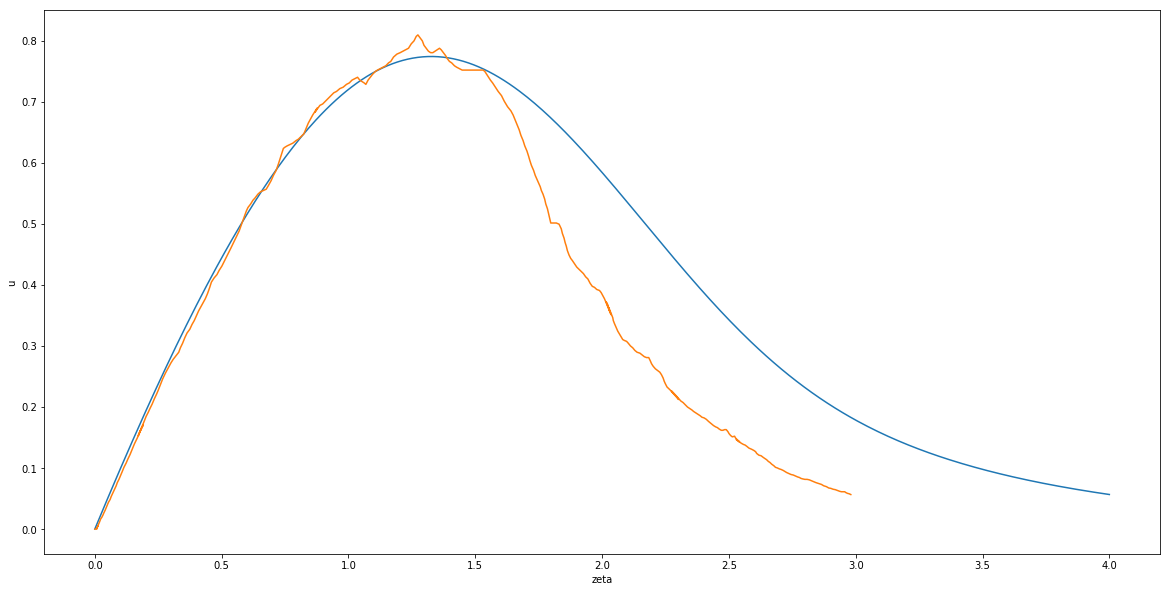

In [11]:

p_0 = 1.23 #kg/m**3
M = 0.029 #kg/mol
g = 9.8 #m/s**2
R = 8.3 #J/(mol*K)
m = 110 #kg (approximate mass of Felix)
T = 300 #K
y_atm = R*T/(M*g)
KA = []
KA_size = np.size(KA)


#mean_KA = np.mean(KA)
mean_KA = .15 #adjust KA to better fit the experimental data
#print(mean_KA)
Gamma = (2*y_atm*mean_KA*p_0*np.exp(-y[0]/y_atm))/m
#print(Gamma)
xi = np.linspace(0,4,400)
u = np.exp(-Gamma*np.exp(xi))*(special.expi(Gamma*np.exp(xi))-special.expi(Gamma))

plt.figure(figsize=[20,10])
plt.plot(xi,u)

xi2 = []
u2 = []
x=0
Np = np.size(y)
y[0] = 39000

while (x < Np):
    xi2.insert(x,(y[0]-y[x])/y_atm)
    u2.insert(x,v[x]**2/(2*g*y_atm))
    x = x+1
    
plt.plot(xi2,u2)

plt.xlabel('zeta')
plt.ylabel('u')
plt.show()